In [2]:
import os
import time
import shutil
import pandas_gbq
import pandas as pd

from datetime import datetime
from google.cloud import bigquery

In [6]:
def move_to_cloud(filename = "key_metrics_test.csv"):
    df = pd.read_csv(filename)
    
    project_id = 'gcp-ent-capstone-dev'
    dataset_id = 'TestTeam4'
    table_name =  dataset_id + "." + filename[:-4]
    location_id = 'us-east1'

    df.to_gbq(table_name, project_id, location_id , if_exists = 'replace')
    
move_to_cloud()


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 6096.37it/s]


In [7]:
def read_from_cloud(query_str = "SELECT * FROM `gcp-ent-capstone-dev.TestTeam4.key_metrics_test2`"):
    client = bigquery.Client('gcp-ent-capstone-dev')
    
    dataframe = (
        client.query(query_str)
        .result()
        .to_dataframe(
        create_bqstorage_client=True,
        )
    )
    
    return dataframe

read_from_cloud()


,regn_nm,sales_state_nm,classic_dst_cd,mo_id,mo_beg_dt,super_line_split,pg_sub_line_rollup,product_line_type_cd,sale_prem_amt,serv_prem_amt,item_inforce_cnt,nbp_cnt,beg_unif_pif_cnt,retained_unif_pif_cnt
0,Central Region,Dakotas,386,"202,112",12/1/2021,Health,Health,536,0,909.62,NaN,NaN,NaN,NaN
1,Central Region,Dakotas,386,"202,003",3/1/2020,Life,AFLIC,800,0,"12,030.14",NaN,NaN,NaN,NaN
2,Central Region,Dakotas,386,"202,007",7/1/2020,Life,AFLIC,800,0,"8,100.99",NaN,NaN,NaN,NaN
3,Central Region,Dakotas,386,"202,005",5/1/2020,Life,AFLIC,800,0,"9,021.76",NaN,NaN,NaN,NaN
4,Central Region,Dakotas,386,"202,108",8/1/2021,Life,AFLIC,800,0,"32,619.95",NaN,NaN,NaN,NaN
5,Central Region,Dakotas,386,"202,010",10/1/2020,Life,AFLIC,800,0,"10,771.31",NaN,NaN,NaN,NaN
6,Central Region,Dakotas,386,"202,110",10/1/2021,Life,AFLIC,801,0,17.92,NaN,NaN,NaN,NaN
7,Central Region,Dakotas,386,"202,112",12/1/2021,Life,AFLIC,801,0,17.92,NaN,NaN,NaN,NaN
8,Central Region,Dakotas,386,"202,001",1/1/2020,Life,AFLIC,803,0,346.66,NaN,NaN,NaN,NaN
9,Central Region,Dakotas,386,"202,005",5/1/2020,Life,AFLIC,803,0,246.66,NaN,NaN,NaN,NaN


In [55]:
source = "/Users/axl115/Documents/Digital Builder/Capstone/Migration/Location1/key_metrics_small.csv"

src_file = source.split("/")[-1]

cd_files = os.listdir()

destn = os.path.abspath(cd_files[-1]).split("/")[:-1]

destn = "/".join(destn) + "/" + src_file

shutil.copy(source, destn)

dst_file = destn.split("/")[-1]

df = pd.read_csv(dst_file)
df

,regn_nm,sales_state_nm,classic_dst_cd,mo_id,mo_beg_dt,super_line_split,pg_sub_line_rollup,product_line_type_cd,sale_prem_amt,serv_prem_amt,item_inforce_cnt,nbp_cnt,beg_unif_pif_cnt,retained_unif_pif_cnt
0,Central Region,Dakotas,386,"202,112",12/1/2021,Health,Health,536,0.00,909.62,NaN,NaN,NaN,NaN
1,Central Region,Dakotas,386,"202,003",3/1/2020,Life,AFLIC,800,0.00,"12,030.14",NaN,NaN,NaN,NaN
2,Central Region,Dakotas,386,"202,003",3/1/2020,Life,AFLIC,804,0.00,202.28,NaN,NaN,NaN,NaN
3,Central Region,Dakotas,386,"202,110",10/1/2021,Life,AFLIC,801,0.00,17.92,NaN,NaN,NaN,NaN
4,Central Region,Dakotas,386,"202,001",1/1/2020,Life,AFLIC,803,0.00,346.66,NaN,NaN,NaN,NaN
5,Central Region,Dakotas,386,"202,110",10/1/2021,Life,AFLIC,804,0.00,130.63,NaN,NaN,NaN,NaN
6,Central Region,Dakotas,386,"202,011",11/1/2020,Life,AFLIC,804,0.00,50.22,NaN,NaN,NaN,NaN
7,Central Region,Dakotas,386,"202,007",7/1/2020,Life,AFLIC,800,0.00,"8,100.99",NaN,NaN,NaN,NaN
8,Central Region,Dakotas,386,"202,005",5/1/2020,Life,AFLIC,803,0.00,246.66,NaN,NaN,NaN,NaN
9,Central Region,Dakotas,386,"202,108",8/1/2021,Life,AFLIC,803,0.00,656.54,NaN,NaN,NaN,NaN


In [65]:
query_str = "SELECT super_line_split AS line, COUNT(super_line_split) AS num \
FROM `gcp-ent-capstone-dev.TestTeam4.key_metrics_small` \
GROUP BY line"

def read_from_cloud(query_str):
    client = bigquery.Client('gcp-ent-capstone-dev')
    
    dataframe = (
        client.query(query_str)
        .result()
        .to_dataframe(
        create_bqstorage_client=True,
        )
    )
    
    return dataframe

read_from_cloud(query_str)

,line,num
0,Auto,1
1,Life,27
2,Health,2


In [94]:
query_str = "SELECT * FROM `gcp-ent-capstone-dev.TestTeam4.key_metrics_small`"

def read_from_cloud(query_str):
    client = bigquery.Client('gcp-ent-capstone-dev')
    
    dataframe = (
        client.query(query_str)
        .result()
        .to_dataframe(
        create_bqstorage_client=True,
        )
    )
    
    return dataframe

df = read_from_cloud(query_str)
df

,regn_nm,sales_state_nm,classic_dst_cd,mo_id,mo_beg_dt,super_line_split,pg_sub_line_rollup,product_line_type_cd,sale_prem_amt,serv_prem_amt,item_inforce_cnt,nbp_cnt,beg_unif_pif_cnt,retained_unif_pif_cnt
0,Central Region,Dakotas,386,"202,106",6/1/2021,Auto,Auto,2001,-48.86,"-1,703.05",NaN,NaN,NaN,NaN
1,Central Region,Dakotas,386,"202,003",3/1/2020,Life,AFLIC,800,0.00,"12,030.14",NaN,NaN,NaN,NaN
2,Central Region,Dakotas,386,"202,007",7/1/2020,Life,AFLIC,800,0.00,"8,100.99",NaN,NaN,NaN,NaN
3,Central Region,Dakotas,386,"202,005",5/1/2020,Life,AFLIC,800,0.00,"9,021.76",NaN,NaN,NaN,NaN
4,Central Region,Dakotas,386,"202,108",8/1/2021,Life,AFLIC,800,0.00,"32,619.95",NaN,NaN,NaN,NaN
5,Central Region,Dakotas,386,"202,010",10/1/2020,Life,AFLIC,800,0.00,"10,771.31",NaN,NaN,NaN,NaN
6,Central Region,Dakotas,386,"202,006",6/1/2020,Life,AFLIC,800,0.00,"9,438.02",NaN,1.0,NaN,NaN
7,Central Region,Dakotas,386,"202,110",10/1/2021,Life,AFLIC,801,0.00,17.92,NaN,NaN,NaN,NaN
8,Central Region,Dakotas,386,"202,112",12/1/2021,Life,AFLIC,801,0.00,17.92,NaN,NaN,NaN,NaN
9,Central Region,Dakotas,386,"202,109",9/1/2021,Life,AFLIC,801,0.00,17.92,NaN,NaN,NaN,NaN


In [79]:
type(df.shape)


a = (4,2)
b = (4,2)

if a == b:
    print("Yes. Same length")
else:
    print("No. Length is different")

No. Length is different


In [80]:
gcp-ent-capstone-dev
TestTeam4
key_metrics_small

NameError: name 'gcp' is not defined

In [88]:
type(str(df.shape[0]))
df.shape

(3, 1)

In [81]:
x = "awesome"

def myfunc():
  x = "fantastic"
  print("Python is " + x)

myfunc()

print("Python is " + x)

Python is fantastic
Python is awesome


In [84]:
def myfunc():
  global x
  x = "fantastic"

myfunc()

print("Python is " + x)

Python is fantastic


In [89]:
x = "awesome"

def myfunc():
  global x
  x = "fantastic"

myfunc()

print("Python is " + x)

Python is fantastic


In [93]:
data_files = os.listdir(".")
data_files = [file for file in data_files if file[-4:] == ".csv"]
print(data_files)


['key_metrics_small.csv', 'd_date_workdays.csv', 'hurricanes.csv', 'small_mapping.csv', 'energy.csv', 'product_mapping.csv', 'type_effectiveness_stats.csv', 'key_metrics.csv', 'key_metrics_test.csv', 'small_movies.csv']


In [97]:
os.remove(data_files[-1])

In [99]:
os.remove(data_files[-1])
data_files

FileNotFoundError: [Errno 2] No such file or directory: 'small_movies.csv'

In [ ]:
#/Users/axl115/Documents/Digital Builder/Capstone/Python\ Code

In [4]:
#source_folder = "/Users/axl115/Documents/Digital Builder/Capstone/Migration/Location1"
source_folder = "/Users/axl115/Documents/Digital Builder/Capstone/Python Code"

data_files = os.listdir(source_folder)
data_files = [file for file in data_files if file[-4:] == ".csv"]
    
print(data_files)

for files in data_files:
    df = pd.read_csv(os.path.join(source_folder, files))
    print(df)

['key_metrics_small.csv', 'd_date_workdays.csv', 'hurricanes.csv', 'small_mapping.csv', 'energy.csv', 'product_mapping.csv', 'type_effectiveness_stats.csv', 'key_metrics.csv', 'key_metrics_test.csv']
           regn_nm sales_state_nm  classic_dst_cd    mo_id  mo_beg_dt  \
0   Central Region        Dakotas             386  202,112  12/1/2021   
1   Central Region        Dakotas             386  202,003   3/1/2020   
2   Central Region        Dakotas             386  202,003   3/1/2020   
3   Central Region        Dakotas             386  202,110  10/1/2021   
4   Central Region        Dakotas             386  202,001   1/1/2020   
5   Central Region        Dakotas             386  202,110  10/1/2021   
6   Central Region        Dakotas             386  202,011  11/1/2020   
7   Central Region        Dakotas             386  202,007   7/1/2020   
8   Central Region        Dakotas             386  202,005   5/1/2020   
9   Central Region        Dakotas             386  202,108   8/1/2021 

In [113]:
type(df['product_line_type_cd'])

pandas.core.series.Series

In [116]:
plot_df = df['product_line_type_cd']

In [108]:
import matplotlib

In [109]:
# ensures that font.size setting remains permanent
%matplotlib inline

pd.set_option('display.max_colwidth', None)

# don't use value > 13! Otherwise your y-axis tick labels will be different.
matplotlib.rcParams["font.size"] = 13 

In [119]:
def bar_plot(df):
    '''This function returns a bar plot of the input dataframe'''
#    df = df.set_index(x)
    ax = df.plot.bar(color='black', legend = False)
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)

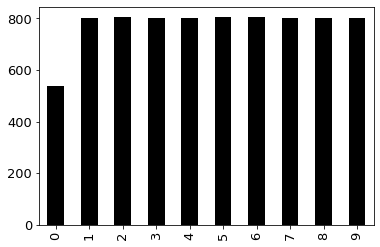

In [120]:
bar_plot(plot_df)